<a href="https://colab.research.google.com/github/AUT-Student/SML-Project/blob/main/SML_Project_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Overall Index Return

In [2]:
overall_dataset = pd.read_csv("/content/Overall.csv")

In [3]:
overall_dataset["Return"] = overall_dataset["Close"].diff()/overall_dataset["Close"]

In [6]:
returns = overall_dataset["Return"]

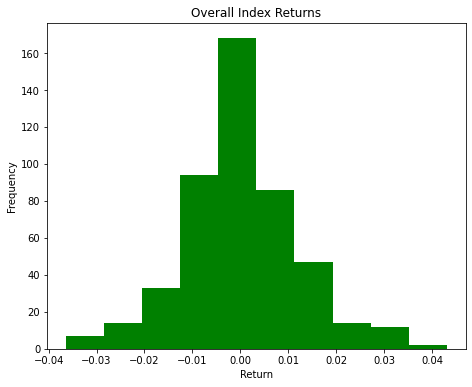

In [7]:
plt.hist(returns, bins=10, color="green")
plt.title("Overall Index Returns")
plt.xlabel("Return")
plt.ylabel("Frequency")
plt.gcf().set_size_inches(7.5, 6)
plt.show()

In [8]:
overall_mean = np.mean(returns*100)
overall_var = np.var(returns*100) 

In [9]:
print(f"mean = {round(overall_mean, 4)}, var = {round(overall_var, 3)}")

mean = 0.0265, var = 1.439


# Symetric Hypothesis Test

Refrences:

https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test

https://mathcracker.com/wilcoxon-signed-ranks

In [10]:
returns = overall_dataset["Return"][1:]

In [11]:
np.median(returns)

3.006084588487516e-05

In [16]:
sign_values = np.sign(np.array(sorted(returns.values, key=lambda x: np.abs(x))))
rank_values = np.array(range(1, len(sign_values)+1))

wp = 0
wm = 0

for rank, sign_sample in zip(rank_values, sign_values):
  if sign_sample == +1:
    wp += rank
  else:
    wm += rank

In [19]:
T = min(wp, wm)

In [20]:
n = len(returns)

In [21]:
z = (T - n*(n+1)/4) / (np.sqrt((n*(n+1)*(2*n+1))/24))

In [23]:
n

477

In [22]:
z

-0.26111361907506153

In [46]:
norm.ppf(1-0.05)

1.6448536269514722

# Share Return

In [4]:
!gdown 1mFilhzDbZqb4xC6ifBLPjha1Svmqcr9X

Downloading...
From: https://drive.google.com/uc?id=1mFilhzDbZqb4xC6ifBLPjha1Svmqcr9X
To: /content/SML_Project_Dataset.zip
100% 400k/400k [00:00<00:00, 107MB/s]


In [5]:
!unzip /content/SML_Project_Dataset.zip

Archive:  /content/SML_Project_Dataset.zip
  inflating: Kekhak.csv              
  inflating: Foolad.csv              
  inflating: Shasta.csv              
  inflating: Khodro.csv              
  inflating: Atlas.csv               


In [6]:
atlas_dataset = pd.read_csv("/content/Atlas.csv")
foolad_dataset = pd.read_csv("/content/Foolad.csv")
kekhak_dataset = pd.read_csv("/content/Kekhak.csv")
khodro_dataset = pd.read_csv("/content/Khodro.csv")
shasta_dataset = pd.read_csv("/content/Shasta.csv")

In [7]:
datasets = {
    "Atlas": atlas_dataset,
    "Foolad": foolad_dataset,
    "Kekhak": kekhak_dataset,
    "Khodro": khodro_dataset,
    "Shasta": shasta_dataset
}

In [43]:
for name in datasets:
  dataset = datasets[name]
  dataset["Return"] = dataset["<CLOSE>"].diff()/dataset["<CLOSE>"]  
  dataset = dataset[(dataset["<DTYYYYMMDD>"] >= 20210101) & (dataset["<DTYYYYMMDD>"] <= 20221230)]
  datasets[name] = dataset

In [61]:
datasets["Khodro"]

,<TICKER>,<DTYYYYMMDD>,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,<OPENINT>,<PER>,<OPEN>,<LAST>,Return
19,Iran.Khodro,20221228,2773.0,2890.0,2773.0,2884.0,2618467370261,907840184,16048,D,2753.0,2876.0,0.021845
20,Iran.Khodro,20221226,2695.0,2800.0,2640.0,2753.0,2181918592507,792665950,17547,D,2667.0,2769.0,-0.047584
21,Iran.Khodro,20221225,2595.0,2681.0,2568.0,2667.0,3408952712446,1278217991,22697,D,2554.0,2681.0,-0.032246
22,Iran.Khodro,20221224,2508.0,2610.0,2500.0,2554.0,1096913790642,429478112,10805,D,2508.0,2574.0,-0.044244
23,Iran.Khodro,20221221,2558.0,2558.0,2483.0,2508.0,516199470688,205837281,6551,D,2493.0,2491.0,-0.018341
...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,Iran.Khodro,20210106,2860.0,2930.0,2800.0,2810.0,1855444422320,661353880,23112,D,2940.0,2800.0,0.024911
464,Iran.Khodro,20210105,3060.0,3070.0,2930.0,2940.0,2505416490130,851598528,31028,D,3080.0,2930.0,0.044218
465,Iran.Khodro,20210104,3060.0,3120.0,2980.0,3080.0,3227598473310,1046244915,39873,D,2980.0,3090.0,0.045455
466,Iran.Khodro,20210103,2900.0,3070.0,2850.0,2980.0,3294771026340,1104370171,44859,D,2970.0,3050.0,-0.033557


In [71]:
for name in datasets:
  print(f"{name}")
  dataset = datasets[name]
  returns = dataset["Return"].values*100
  print("Mean: ", np.mean(returns))
  print("Var:", np.var(returns))
  print("========")

Atlas
Mean:  -0.09573496250715627
Var: 2.3585960165145825
Foolad
Mean:  0.0850939498372268
Var: 12.35830379220556
Kekhak
Mean:  0.21973264456336938
Var: 9.950141270633544
Khodro
Mean:  -0.024539621195258734
Var: 7.220969513155132
Shasta
Mean:  0.3221266753881254
Var: 29.718167983951613


In [132]:
for name in datasets:
  print(f"{name}")
  dataset = datasets[name]
  returns = dataset["Return"].values*100
  returns = returns[(returns<10) & (returns>-10)]
  print("Mean: ", np.mean(returns))
  print("Var:", np.var(returns))
  print("========")

Atlas
Mean:  -0.09573496250715627
Var: 2.3585960165145825
Foolad
Mean:  -0.09136265610686939
Var: 4.805629355443519
Kekhak
Mean:  0.10458868682046843
Var: 3.8730788761640347
Khodro
Mean:  -0.024539621195258734
Var: 7.220969513155132
Shasta
Mean:  -0.03131202125069685
Var: 5.0155109182126925


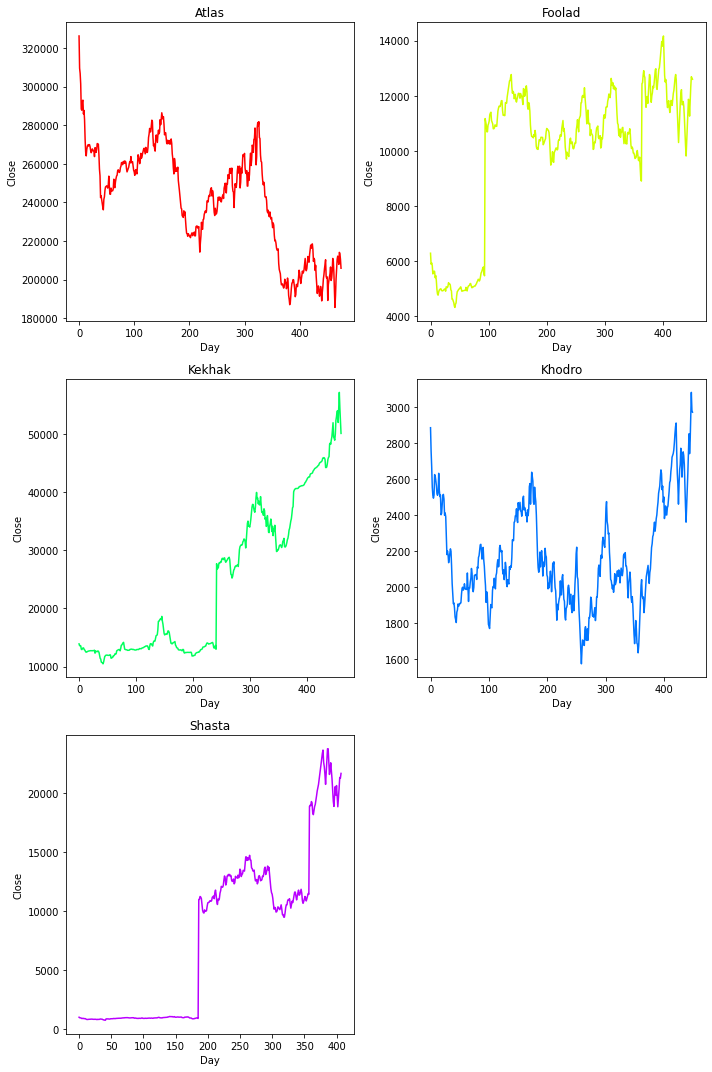

In [85]:
fig, ax = plt.subplots(3,2)
colors = plt.cm.get_cmap("hsv", 6)
for i, name in enumerate(datasets):
  ax[i//2][i%2].plot(datasets[name]["<CLOSE>"].values, c=colors(i))
  ax[i//2][i%2].set_title(name)
  ax[i//2][i%2].set_xlabel("Day")
  ax[i//2][i%2].set_ylabel("Close")

fig.delaxes(ax[2][1])
fig.set_size_inches(10, 15)
fig.tight_layout()
plt.show()

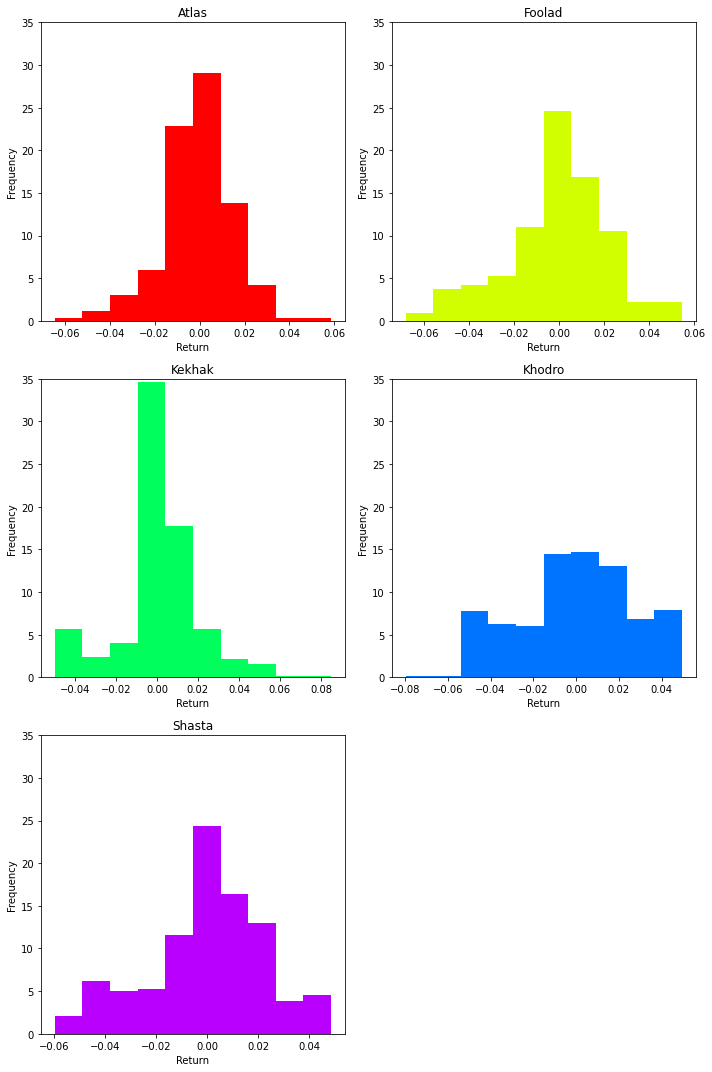

In [131]:
fig, ax = plt.subplots(3,2)
colors = plt.cm.get_cmap("hsv", 6)
for i, name in enumerate(datasets):
  returns = datasets[name]["Return"].values
  returns = returns[(returns<0.10) & (-0.10 < returns)]
  ax[i//2][i%2].hist(returns, density=True, color=colors(i))
  ax[i//2][i%2].set_ylim([0, 35])
  
  ax[i//2][i%2].set_title(name)
  ax[i//2][i%2].set_xlabel("Return")
  ax[i//2][i%2].set_ylabel("Frequency")

fig.delaxes(ax[2][1])
fig.set_size_inches(10, 15)
fig.tight_layout()
plt.show()

# Window Returns

In [8]:
overall_dataset

,J-Date,Date,Open,High,Low,Close,Adj Close,Volume,Return
0,1399-10-13,2021-01-02,1389700.0,1389700.0,1354110.0,1354114.0,1354147.1,6065577245,NaN
1,1399-10-14,2021-01-03,1347700.0,1357900.0,1345820.0,1355475.0,1355351.2,8925080297,0.001004
2,1399-10-15,2021-01-04,1361540.0,1375350.0,1361540.0,1374501.0,1374483.2,8791746228,0.013842
3,1399-10-16,2021-01-05,1372480.0,1372480.0,1350210.0,1350211.0,1350233.2,8904611865,-0.017990
4,1399-10-17,2021-01-06,1342160.0,1342160.0,1310450.0,1310709.0,1310755.8,8503250697,-0.030138
...,...,...,...,...,...,...,...,...,...
473,1401-10-03,2022-12-24,1500750.0,1538000.0,1500750.0,1538003.0,1538003.2,10103385881,0.027179
474,1401-10-04,2022-12-25,1547140.0,1563560.0,1547140.0,1563567.0,1563567.4,10776995540,0.016350
475,1401-10-05,2022-12-26,1566820.0,1576410.0,1563160.0,1576397.0,1576396.8,9446689906,0.008139
476,1401-10-07,2022-12-28,1588820.0,1647310.0,1588820.0,1647314.0,1647314.5,15175183890,0.043050


In [17]:
overall_window_dataset = overall_dataset[["Date", "Return"]]

In [19]:
overall_window_dataset["Win10Mean"] = overall_window_dataset["Return"].rolling(10).mean()
overall_window_dataset["Win10Var"] = overall_window_dataset["Return"].rolling(10).var()

overall_window_dataset["Win20Mean"] = overall_window_dataset["Return"].rolling(20).mean()
overall_window_dataset["Win20Var"] = overall_window_dataset["Return"].rolling(20).var()

overall_window_dataset["Win50Mean"] = overall_window_dataset["Return"].rolling(50).mean()
overall_window_dataset["Win50Var"] = overall_window_dataset["Return"].rolling(50).var()

<ipython-input-19-6df9fb5c19f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_window_dataset["Win10Mean"] = overall_window_dataset["Return"].rolling(10).mean()
<ipython-input-19-6df9fb5c19f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_window_dataset["Win10Var"] = overall_window_dataset["Return"].rolling(10).var()
<ipython-input-19-6df9fb5c19f5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [23]:
overall_window_dataset

,Date,Return,Win10Mean,Win10Var,Win20Mean,Win20Var,Win50Mean,Win50Var
0,2021-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-03,0.001004,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-04,0.013842,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-05,-0.017990,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-06,-0.030138,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
473,2022-12-24,0.027179,0.010441,0.000160,0.004338,0.000127,0.003019,0.000132
474,2022-12-25,0.016350,0.011671,0.000157,0.005227,0.000132,0.003447,0.000134
475,2022-12-26,0.008139,0.011067,0.000158,0.005557,0.000131,0.003612,0.000134
476,2022-12-28,0.043050,0.012269,0.000225,0.007503,0.000201,0.004451,0.000165


In [24]:
overall_window_dataset[50:]

,Date,Return,Win10Mean,Win10Var,Win20Mean,Win20Var,Win50Mean,Win50Var
50,2021-03-15,0.007265,0.005902,0.000093,-0.000160,0.000085,-0.001698,0.000335
51,2021-03-16,0.028103,0.008319,0.000140,0.001703,0.000120,-0.001156,0.000353
52,2021-03-17,0.013107,0.010339,0.000112,0.002659,0.000122,-0.001170,0.000352
53,2021-03-27,0.001462,0.011187,0.000087,0.002960,0.000120,-0.000781,0.000347
54,2021-03-28,-0.002077,0.010484,0.000101,0.003270,0.000114,-0.000220,0.000329
...,...,...,...,...,...,...,...,...
473,2022-12-24,0.027179,0.010441,0.000160,0.004338,0.000127,0.003019,0.000132
474,2022-12-25,0.016350,0.011671,0.000157,0.005227,0.000132,0.003447,0.000134
475,2022-12-26,0.008139,0.011067,0.000158,0.005557,0.000131,0.003612,0.000134
476,2022-12-28,0.043050,0.012269,0.000225,0.007503,0.000201,0.004451,0.000165


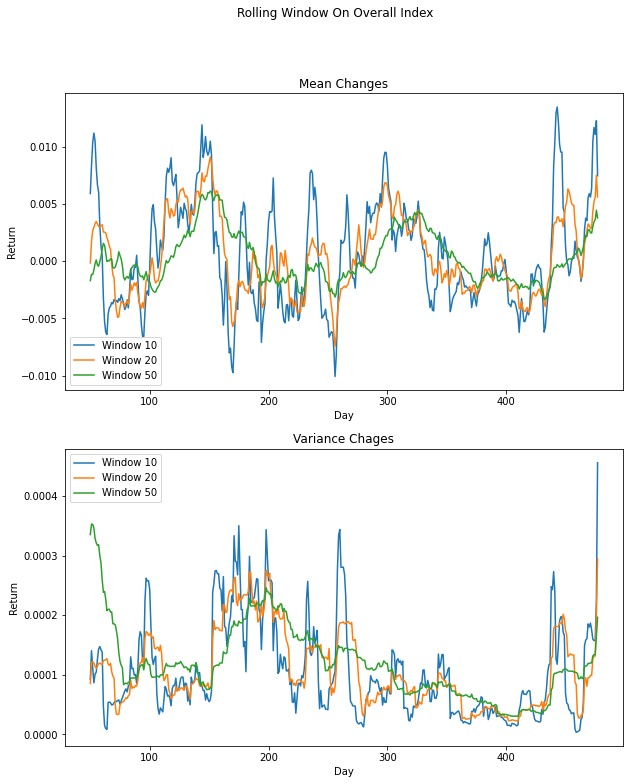

In [38]:
fig, ax = plt.subplots(2)
ax[0].plot(overall_window_dataset[50:]["Win10Mean"], label="Window 10")
ax[0].plot(overall_window_dataset[50:]["Win20Mean"], label="Window 20")
ax[0].plot(overall_window_dataset[50:]["Win50Mean"], label="Window 50")
ax[0].legend()
ax[0].set_xlabel("Day")
ax[0].set_ylabel("Return")
ax[0].set_title("Mean Changes")

ax[1].plot(overall_window_dataset[50:]["Win10Var"], label="Window 10")
ax[1].plot(overall_window_dataset[50:]["Win20Var"], label="Window 20")
ax[1].plot(overall_window_dataset[50:]["Win50Var"], label="Window 50")
ax[1].legend()
ax[1].set_xlabel("Day")
ax[1].set_ylabel("Return")
ax[1].set_title("Variance Chages")

fig.suptitle("Rolling Window On Overall Index")
fig.set_size_inches(10, 12)
plt.show()

<ipython-input-44-ee2ca4954ad2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  window_dataset["Win10Mean"] = window_dataset["Return"].rolling(10).mean()
<ipython-input-44-ee2ca4954ad2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  window_dataset["Win10Var"] = window_dataset["Return"].rolling(10).var()
<ipython-input-44-ee2ca4954ad2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

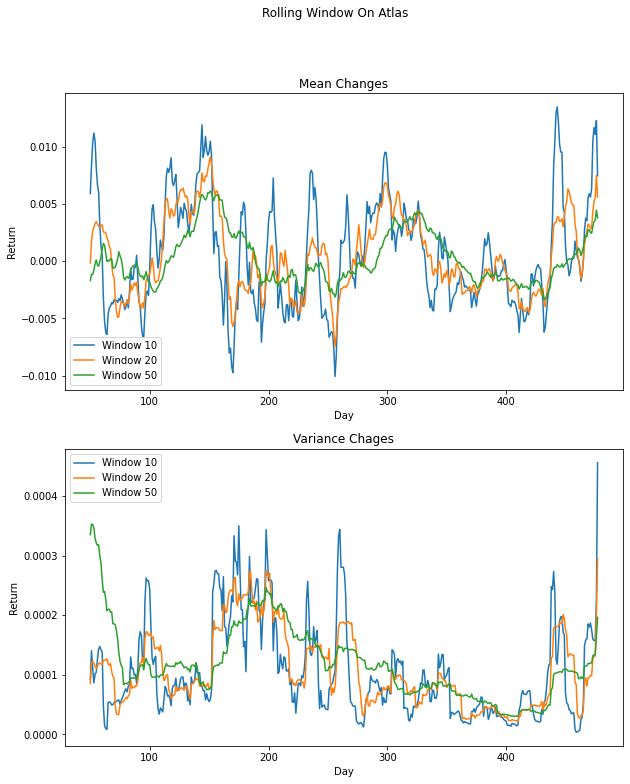

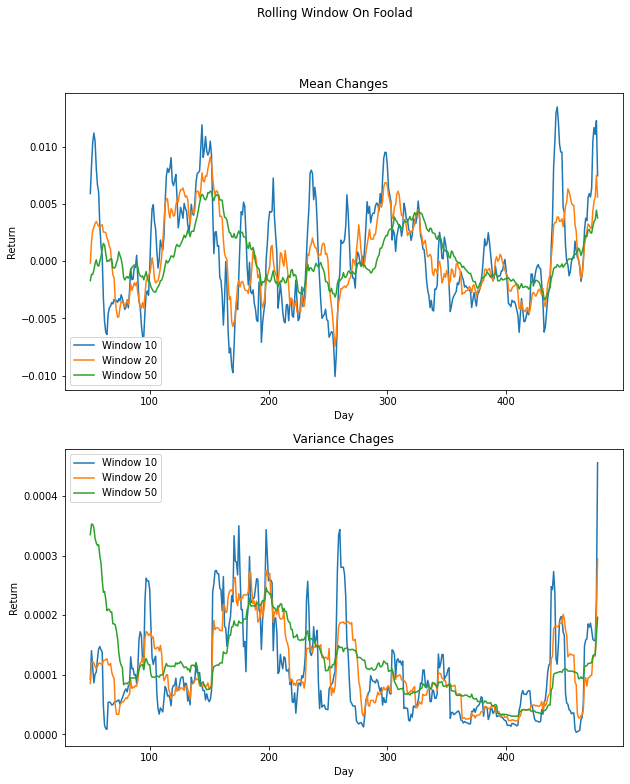

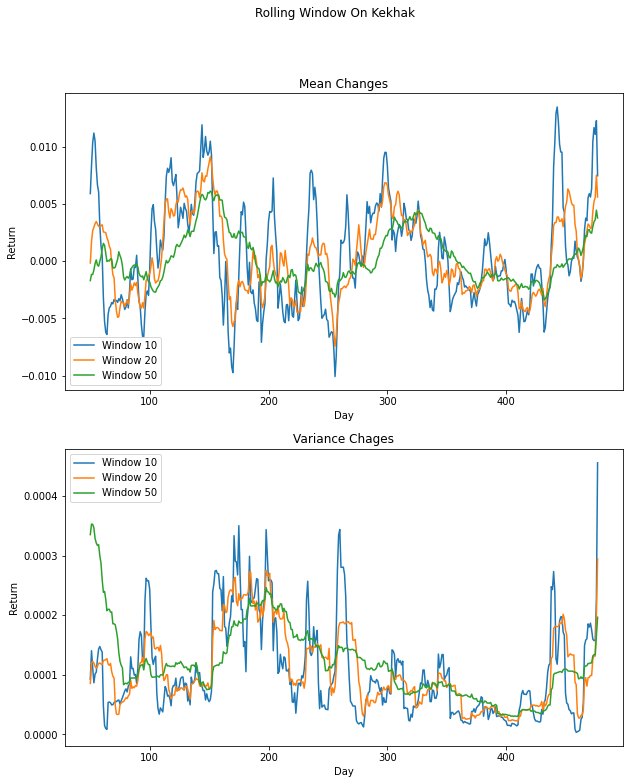

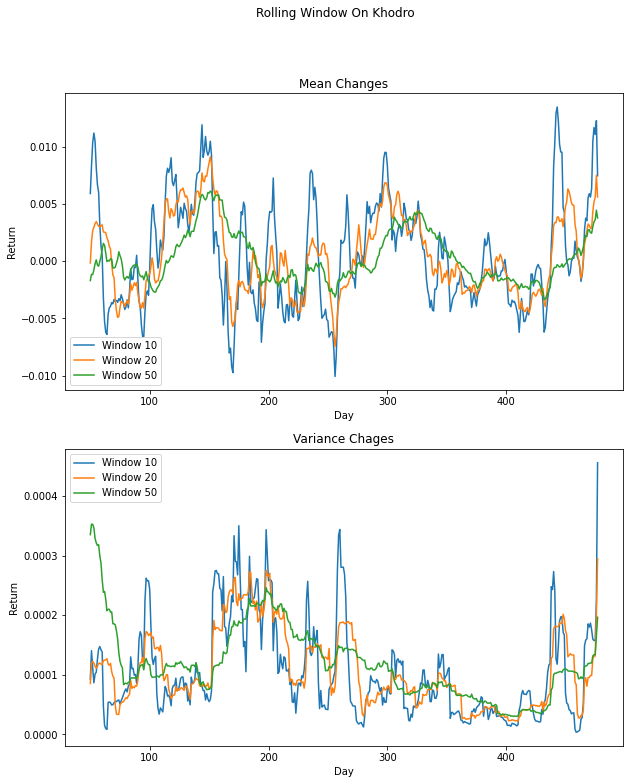

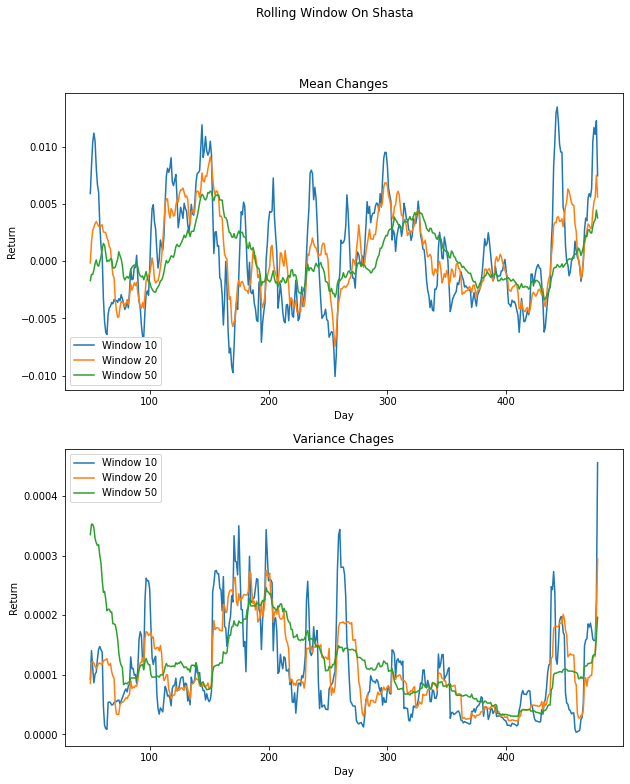

In [44]:
for name in datasets:
  dataset = datasets[name]
  window_dataset = dataset[["<DTYYYYMMDD>", "Return"]]

  window_dataset["Win10Mean"] = window_dataset["Return"].rolling(10).mean()
  window_dataset["Win10Var"] = window_dataset["Return"].rolling(10).var()

  window_dataset["Win20Mean"] = window_dataset["Return"].rolling(20).mean()
  window_dataset["Win20Var"] = window_dataset["Return"].rolling(20).var()

  window_dataset["Win50Mean"] = window_dataset["Return"].rolling(50).mean()
  window_dataset["Win50Var"] = window_dataset["Return"].rolling(50).var()

  fig, ax = plt.subplots(2)
  ax[0].plot(overall_window_dataset[50:]["Win10Mean"], label="Window 10")
  ax[0].plot(overall_window_dataset[50:]["Win20Mean"], label="Window 20")
  ax[0].plot(overall_window_dataset[50:]["Win50Mean"], label="Window 50")
  ax[0].legend()
  ax[0].set_xlabel("Day")
  ax[0].set_ylabel("Return")
  ax[0].set_title("Mean Changes")

  ax[1].plot(overall_window_dataset[50:]["Win10Var"], label="Window 10")
  ax[1].plot(overall_window_dataset[50:]["Win20Var"], label="Window 20")
  ax[1].plot(overall_window_dataset[50:]["Win50Var"], label="Window 50")
  ax[1].legend()
  ax[1].set_xlabel("Day")
  ax[1].set_ylabel("Return")
  ax[1].set_title("Variance Chages")

  fig.suptitle(f"Rolling Window On {name}")
  fig.set_size_inches(10, 12)
  plt.show()

# Finpy TSE

In [4]:
!pip install finpy_tse

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 KB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.5 MB/s eta 0:00:00
  Created wheel for unsync: filename=unsync-1.4.0-py3-none-any.whl size=4972 sha256=d14c5c4b1bcb63fb664446820cdba35abdd07585f6639f3bc107250bb1aa84ae
  Stored in directory: /root/.cache/pip/wheels/1d/ba/bb/d6977ef463ab9150e490fe3438c113ac828e1c845a6b09a611
Successfully built unsync


In [5]:
import pandas as pd
import finpy_tse as fpy

DF2 = fpy.Get_Price_History(
    stock='خودرو',
    start_date='1400-01-01',
    end_date='1401-01-01',
    ignore_date=False,
    adjust_price=False,
    show_weekday=False,
    double_date=False)

print(DF2)

KeyboardInterrupt: ignored

In [ ]:
import finpy_tse as tse

DF2 = tse.Get_CWI_History(start_date='1396-01-01',
                          end_date='1396-01-01',
                          ignore_date=False,
                          just_adj_close=False,
                          show_weekday=True,
                          double_date=True)

KeyboardInterrupt: ignored

In [ ]:
!pip install finpy-tse

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import finpy_tse as fpy


In [ ]:
fpy.Get_Price_History(
    stock='خودرو',
    start_date='1400-01-01',
    end_date='1401-01-01',
    ignore_date=False,
    adjust_price=False,
    show_weekday=False,
    double_date=False)

ConnectionError: ignored